In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.shape

(20640, 10)

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# total bedrooms have some null values that needs to be cleaned up during data cleaning

# also, ocean_proximity is a string value so we have to change it

In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

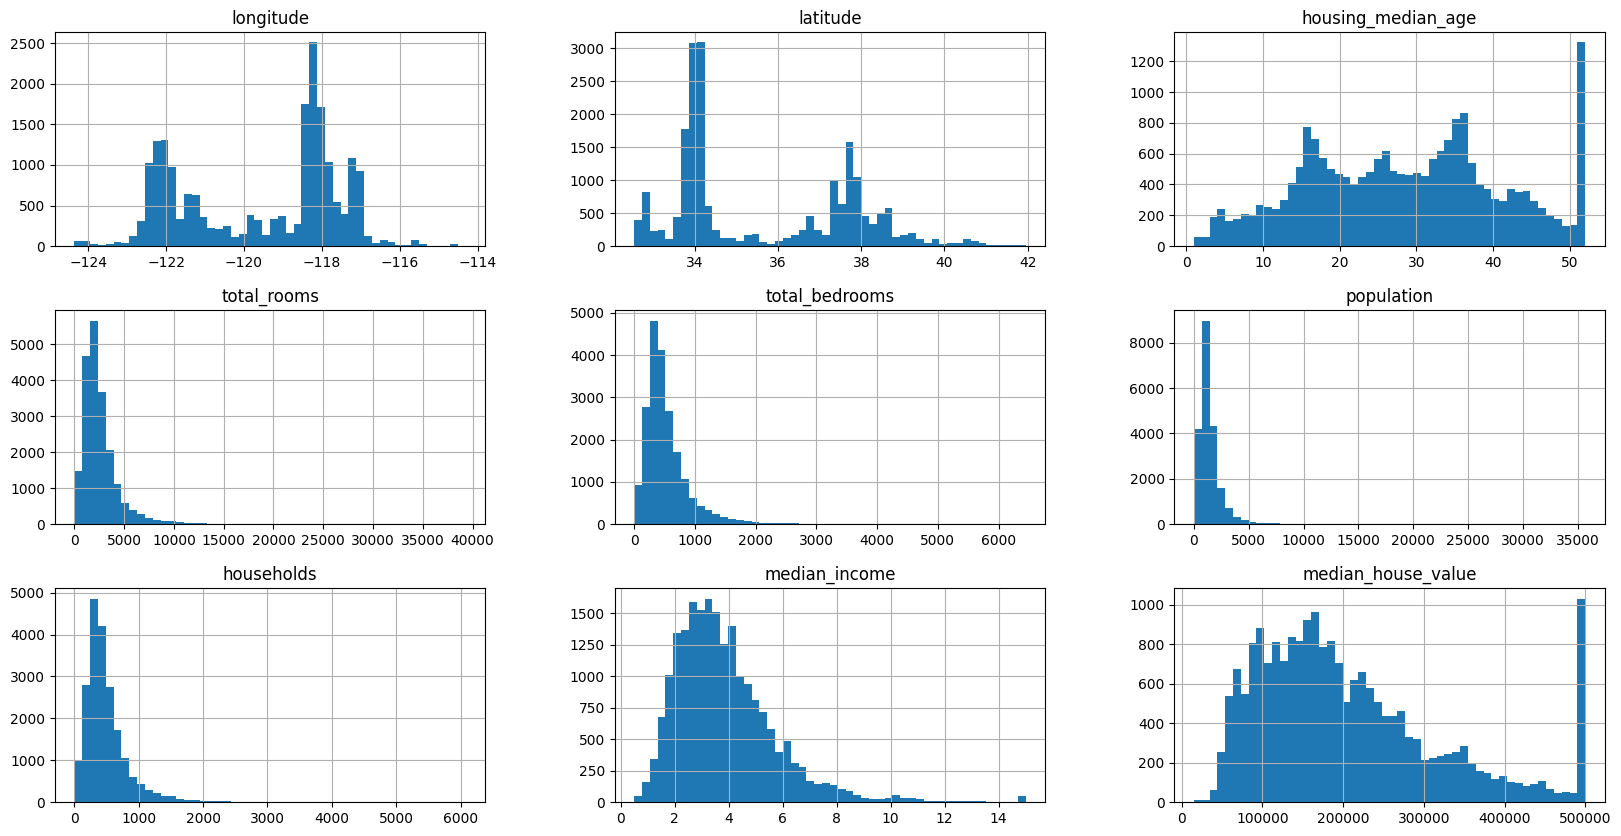

In [14]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,10))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

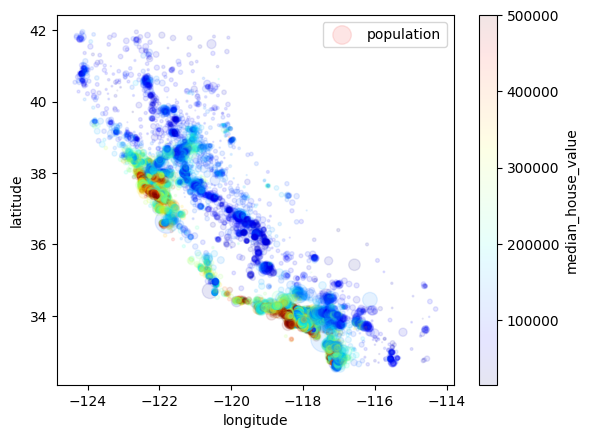

In [22]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.1, 
             s = housing['population']/100, label = 'population', 
             c = 'median_house_value', cmap = plt.get_cmap('jet')) 
# s = size # c= color

In [30]:
housing.drop('ocean_proximity', axis = 1).corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# now its time to take care about the missing values of the bedrooms number

# we could think of some ways to impute the value

In [31]:
housing_na = housing.dropna(subset=["total_bedrooms"]) # drop all the observations in which total_bedroom is missing

In [32]:
housing_na.shape

(20433, 10)

In [34]:
# from sklearn.preprocessing import OneHotEncoder

In [36]:
dummies = pd.get_dummies(housing_na.ocean_proximity)

In [39]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False


In [40]:
housing_na_dummies = pd.concat([housing_na, dummies],axis=1)

In [45]:
housing_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [48]:
housing_clean = housing_na_dummies.drop(['ISLAND'],axis=1) # Drop one of the One Hot Encoded value

In [47]:
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


# Creating Features and Targets

In [49]:
X = housing_clean.drop('median_house_value',axis=1)

In [50]:
y = housing_clean['median_house_value']

In [51]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [52]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Display the intercept and coefficients of the model
print(f"Intercept = {model.intercept_}")

Intercept = -2085620.3876403193


In [57]:
print(f"Coefficients: {model.coef_}")

Coefficients: [-2.71087463e+04 -2.56578075e+04  1.08136421e+03 -6.32214552e+00
  1.03004042e+02 -3.64097514e+01  4.31427249e+01  3.92770830e+04
 -2.13653374e+05 -2.52893592e+05 -2.19885791e+05 -2.10486897e+05]


In [58]:
print(f" The R-Squared Value is: {model.score(X_train,y_train)}")

 The R-Squared Value is: 0.6456482397646103


In [66]:
# Predicting with our model
y_pred = model.predict(X_test)
performance = pd.DataFrame({'Predictions': y_pred,'Actual Values' :y_test, 'Error %': (y_pred - y_test) * 100 / y_test })
performance.head()

,Predictions,Actual Values,Error %
14416,201882.959868,245800.0,-17.866981
16383,147279.682144,137900.0,6.801800
7731,207796.609798,218200.0,-4.767823
1410,180487.576722,220800.0,-18.257438
1335,190323.923130,170500.0,11.626934


In [70]:
# preparing data for plotting
performance.reset_index(drop = True, inplace = True)
performance.reset_index(inplace = True)
performance.head()

,index,Predictions,Actual Values,Error %
0,0,201882.959868,245800.0,-17.866981
1,1,147279.682144,137900.0,6.801800
2,2,207796.609798,218200.0,-4.767823
3,3,180487.576722,220800.0,-18.257438
4,4,190323.923130,170500.0,11.626934


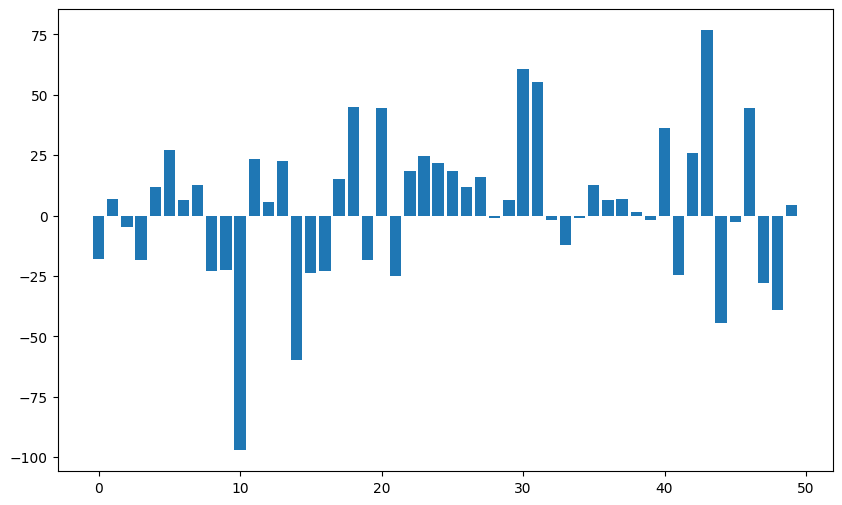

In [73]:
# plot the residuals
fig = plt.figure(figsize=(10,6))
plt.bar('index','Error %',data=performance[:50])
plt.show()